In [ ]:
!pip install google-colab-shell
from google_colab_shell import getshell

In [ ]:
getshell()

getshell(height=400)

In [ ]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/cnn.zip -d /content/drive/MyDrive/UTKFace

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
unzip:  cannot find or open /content/drive/MyDrive/cnn.zip, /content/drive/MyDrive/cnn.zip.zip or /content/drive/MyDrive/cnn.zip.ZIP.


In [ ]:
import tensorflow as tf
from keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
# data_dir = "/content/drive/MyDrive/UTKFace/UTKFace"
# data_dir = '/content/utkface_aligned_cropped/UTKFace '
data_dir = '/content/utkface_aligned_cropped/UTKFace'
# /content/utkface_aligned_cropped/UTKFace
# /content/UTKFace
images = []
ages = []

for file in os.listdir(data_dir):
    if file.endswith(".jpg"):
        age = int(file.split("_")[0])  # Extract age from filename
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        ages.append(age)


images = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
ages = np.array(ages)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

In [ ]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
top_layer = Dense(1)(Dense(512, activation='relu')(GlobalAveragePooling2D()(base_model.output)))
model = Model(base_model.input, top_layer)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20,
    verbose=1
)

Epoch 1/20
593/593 [==============================] - 195s 328ms/step - loss: 187.2442 - mae: 10.5633 - val_loss: 165.1243 - val_mae: 9.9064
Epoch 2/20
593/593 [==============================] - 191s 322ms/step - loss: 160.2391 - mae: 9.6262 - val_loss: 152.3427 - val_mae: 9.4486
Epoch 3/20
593/593 [==============================] - 189s 319ms/step - loss: 151.8938 - mae: 9.3179 - val_loss: 149.1830 - val_mae: 9.3675
Epoch 4/20
593/593 [==============================] - 190s 320ms/step - loss: 147.2239 - mae: 9.1520 - val_loss: 168.4302 - val_mae: 10.2440
Epoch 5/20
593/593 [==============================] - 189s 319ms/step - loss: 143.2984 - mae: 9.0158 - val_loss: 142.1349 - val_mae: 9.0560
Epoch 6/20
593/593 [==============================] - 191s 322ms/step - loss: 139.9022 - mae: 8.8798 - val_loss: 140.3359 - val_mae: 8.9002
Epoch 7/20
593/593 [==============================] - 191s 322ms/step - loss: 137.3577 - mae: 8.7882 - val_loss: 138.3945 - val_mae: 8.8766
Epoch 8/20
593/593

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

149/149 - 38s - loss: 129.6497 - mae: 8.6046 - 38s/epoch - 256ms/step
Test Loss (MSE): 129.6497039794922
Test MAE: 8.604641914367676


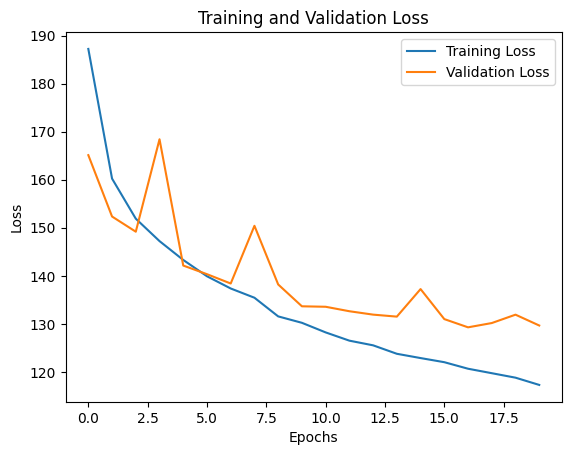

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

149/149 [==============================] - 39s 260ms/step


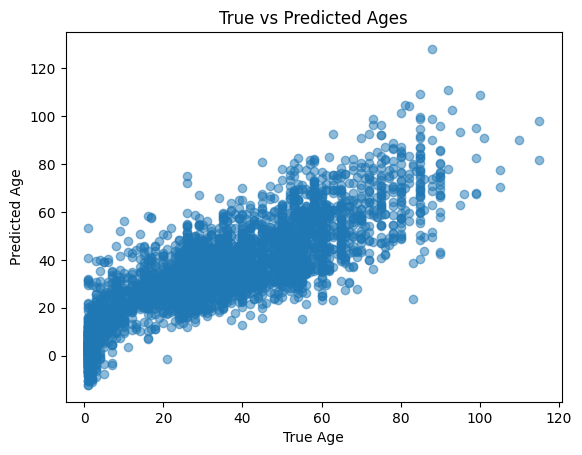

In [ ]:
# Predict on the test set
predictions = model.predict(X_test)

# Plot true vs predicted ages
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("True vs Predicted Ages")
plt.show()